In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, measure


# tried with 2 images ///tesst.png and coins2.png/// 
image = io.imread('tesst.png', as_gray=True)

radius = 5  #taking 5 as radius tried with different radiuses

#No' of disks
preprocessed_image = morphology.binary_opening(image)  
disk_separated = morphology.binary_erosion(preprocessed_image, footprint=morphology.disk(radius))  
labeled_image = measure.label(disk_separated)  
disk_count = np.max(labeled_image) 



#bound pixels
eroded_image = morphology.binary_erosion(image)  
boundary_image = np.subtract(image, eroded_image) 
boundary_pixel_count = np.sum(boundary_image)  



#common pixels 
labeled_objects = measure.label(preprocessed_image) 
intersection_image = np.zeros_like(image)  

for label in np.unique(labeled_objects)[1:]:
    object_mask = labeled_objects == label
    intersection_image = np.logical_or(intersection_image, object_mask)

    
#white pixel    
common_pixel_count = np.sum(intersection_image)  

print("Number of disks:", disk_count)
print("Number of boundary pixels:", boundary_pixel_count)
print("Number of common pixels between objects:", common_pixel_count)




Number of disks: 4
Number of boundary pixels: 3624.5493556862734
Number of common pixels between objects: 700884


Number of disks: 2
Number of boundary pixels: 174393902
Number of common pixels between objects: 690110


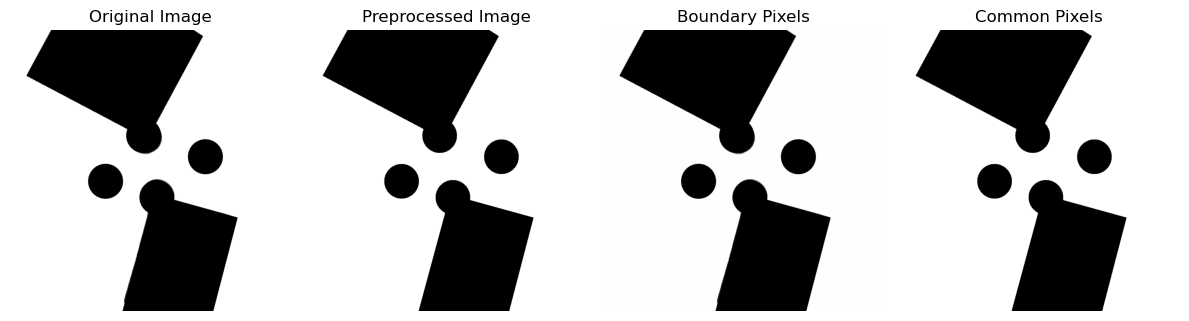